In [5]:
import numpy as np
input_vector=np.array([2,4,11])
input_vector=np.array(input_vector, ndmin=2).T
print("input_vector:\n",input_vector)
print("shape of input_vecor: \n",input_vector.shape)

input_vector:
 [[ 2]
 [ 4]
 [11]]
shape of input_vecor: 
 (3, 1)


In [8]:
number_of_samples=1200
low=-1
high=0
s=np.random.uniform(low,high,number_of_samples)
print(np.all(s>=-1) and np.all(s<0))

True


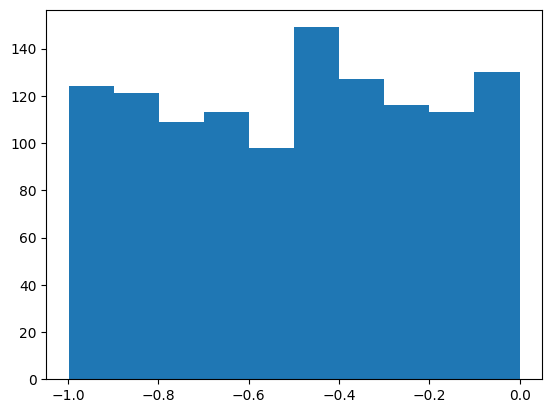

In [10]:
#Histograma esantioanelor creata cu funtia uniforma in exemplul anterior
import matplotlib.pyplot as plt
plt.hist(s)
plt.show()

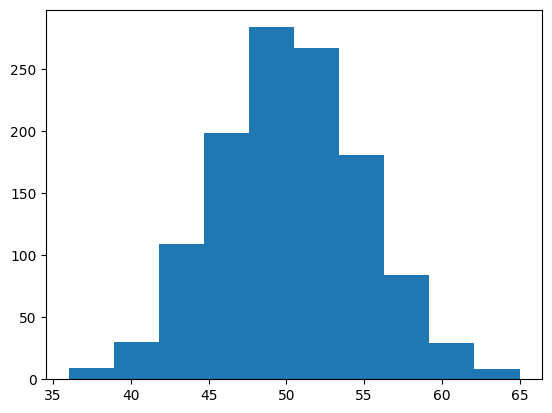

In [16]:
#Functie binomiala
s=np.random.binomial(100,0.5,1200)
plt.hist(s)
plt.show()

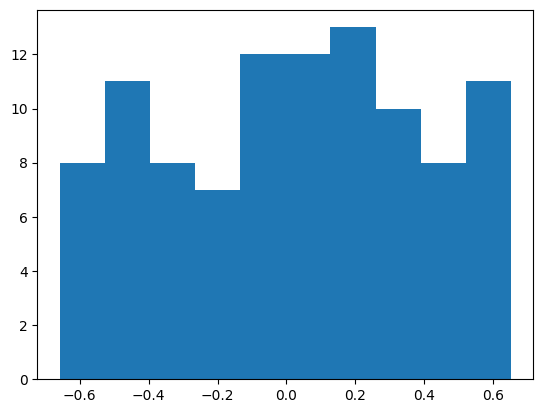

In [32]:
from scipy.stats import truncnorm
s=truncnorm(a=-2/3.,b=2/3., scale=1, loc=0).rvs(size=100)
plt.hist(s)
plt.show()

In [34]:
#retea neuronala cu python
import numpy as np
from scipy.stats import truncnorm
def truncated_normal(mean=0,sd=0,lo=0,upp=10):
  return truncnorm((lo-mean)/sd, (upp-mean)/sd, loc=mean,scale=sd)
class NeuralNetwork:
  def __init__(self,
               no_of_in_nodes,
               no_of_out_nodes,
               no_of_hidden_nodes,
               learning_rate):
    self.no_of_in_nodes=no_of_in_nodes
    self.no_of_hidden_nodes=no_of_hidden_nodes
    self.no_of_out_nodes=no_of_out_nodes
    self.learning_rate=learning_rate
    self.create_weight_matrices()
  def create_weight_matrices(self):
    rad=1/np.sqrt(self.no_of_in_nodes)
    X=truncated_normal(mean=0,sd=1,lo=-rad,upp=rad)
    self.weights_in_hidden=X.rvs((self.no_of_hidden_nodes,self.no_of_in_nodes))
    rad=1/np.sqrt(self.no_of_hidden_nodes)
    X=truncated_normal(mean=0,sd=1,lo=-rad,upp=rad)
    self.weights_hidden_out=X.rvs((self.no_of_out_nodes,self.no_of_hidden_nodes))

  def train(self):
    pass

  def run(self):
    pass

simple_network=NeuralNetwork(no_of_in_nodes=3,
                             no_of_out_nodes=2,
                             no_of_hidden_nodes=4,
                             learning_rate=0.1)
print(simple_network.weights_in_hidden)
print(simple_network.weights_hidden_out)

[[ 0.31324791  0.16454117  0.03166573]
 [-0.56758588 -0.27648897  0.17398972]
 [-0.4151471  -0.00183804  0.153289  ]
 [ 0.18512764  0.37030611  0.49468849]]
[[-0.38868252 -0.03045996 -0.18053238 -0.05288872]
 [ 0.05378365  0.13091128  0.1669922  -0.43731751]]


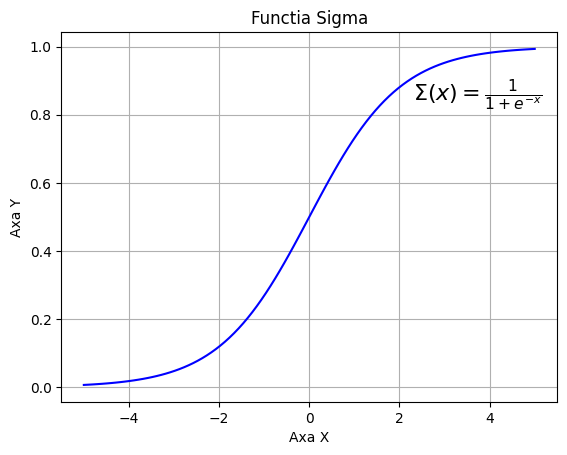

In [35]:
import numpy as np
import matplotlib.pyplot as plt
def Sigma(x):
  return 1/(1+np.exp(-x))
x=np.linspace(-5,5,100)

plt.plot(x,Sigma(x),'b')
plt.xlabel("Axa X")
plt.ylabel("Axa Y")
plt.title("Functia Sigma")

plt.grid()

plt.text(2.3,0.84,r'$\Sigma(x)=\frac{1}{1+e^{-x}}$',fontsize=16)

plt.show()

In [44]:
#Adaugarea unei metode run
#Implementam o metoda run sau predict pentru clasa noastra de retea neuronala folosim scipy.special ca functie de activare si o redenumim activation_function
import numpy as np
from scipy.special import expit as activation_funtion
from scipy.stats import truncnorm
def truncated_normal(mean=0,sd=0,lo=0,upp=10):
  return truncnorm((lo-mean)/sd, (upp-mean)/sd, loc=mean,scale=sd)
class NeuralNetwork:
  def __init__(self,
               no_of_in_nodes,
               no_of_out_nodes,
               no_of_hidden_nodes,
               learning_rate):
    self.no_of_in_nodes=no_of_in_nodes
    self.no_of_hidden_nodes=no_of_hidden_nodes
    self.no_of_out_nodes=no_of_out_nodes
    self.learning_rate=learning_rate
    self.create_weight_matrices()
  def create_weight_matrices(self):
    rad=1/np.sqrt(self.no_of_in_nodes)
    X=truncated_normal(mean=0,sd=1,lo=-rad,upp=rad)
    self.weights_in_hidden=X.rvs((self.no_of_hidden_nodes,self.no_of_in_nodes))
    rad=1/np.sqrt(self.no_of_hidden_nodes)
    X=truncated_normal(mean=0,sd=1,lo=-rad,upp=rad)
    self.weights_hidden_out=X.rvs((self.no_of_out_nodes,self.no_of_hidden_nodes))

  def train(self,input_vector,target_vector):
    pass

  def run(self, input_vector):
    input_vector=np.array(input_vector,ndmin=2).T
    input_hidden=activation_funtion(self.weights_in_hidden @ input_vector)
    output_vector=activation_funtion(self.weights_hidden_out @ input_hidden)
    return output_vector

simple_network=NeuralNetwork(no_of_in_nodes=2,
                             no_of_out_nodes=2,
                             no_of_hidden_nodes=4,
                             learning_rate=0.6)
simple_network.run([3, 4])

array([[0.4540331 ],
       [0.44317948]])